In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Trigger import *

df = pd.read_csv("test.csv", index_col=0)
df.sort_values(["file"], inplace=True, ascending=False)
df

,file,length,start_frame,end_frame,rect_min_x,rect_min_y,rect_max_x,rect_max_y,section,time_block,line_fit
9,./data//M20190901_044600_USUtah_UT3_N1.avi,30.083218,24,43,1065.0,829.0,1074.0,859.0,120,4,NaN
6,./data//M20190901_044525_USUtah_UT3_N1.avi,33.241539,28,33,718.0,833.0,722.0,866.0,118,8,NaN
0,./data//M20190901_044327_USUtah_UT3_N1.avi,20.024984,17,20,1748.0,594.0,1767.0,595.0,78,7,NaN
1,./data//M20190901_044327_USUtah_UT3_N1.avi,237.427887,26,44,1320.0,333.0,1516.0,467.0,59,6,NaN
4,./data//M20190901_044218_USUtah_UT3_N1.avi,100.284592,28,42,1782.0,412.0,1801.0,526.0,62,8,NaN
11,./data//M20190901_044136_USUtah_UT3_N1.avi,207.935089,24,47,1061.0,400.0,1194.0,560.0,73,4,NaN
10,./data//M20190901_044120_USUtah_UT3_N1.avi,150.950317,28,38,1670.0,2.0,1800.0,78.0,14,8,NaN
5,./data//M20190901_043930_USUtah_UT3_N1.avi,61.032780,25,37,985.0,810.0,1005.0,868.0,104,5,NaN
12,./data//M20190901_043910_USUtah_UT3_N1.avi,131.711807,29,37,983.0,47.0,1085.0,132.0,8,9,NaN
13,./data//M20190901_043910_USUtah_UT3_N1.avi,22.803509,1,67,1814.0,751.0,1834.0,763.0,111,1,NaN


In [2]:
triggers = read_df(df)
triggers

array([Trigger(file=PosixPath('data/M20190901_044327_USUtah_UT3_N1.avi'), length=20.02498435974121, start_frame=17, end_frame=20, bounding_rect=Rect(min_x=1748.0, min_y=594.0, max_x=1767.0, max_y=595.0), section=78, time_block=7, line_fit=nan),
       Trigger(file=PosixPath('data/M20190901_044327_USUtah_UT3_N1.avi'), length=237.42788696289065, start_frame=26, end_frame=44, bounding_rect=Rect(min_x=1320.0, min_y=333.0, max_x=1516.0, max_y=467.0), section=59, time_block=6, line_fit=nan),
       Trigger(file=PosixPath('data/M20190901_043802_USUtah_UT3_N1.avi'), length=118.00423431396484, start_frame=28, end_frame=39, bounding_rect=Rect(min_x=104.0, min_y=402.0, max_x=176.0, max_y=494.0), section=49, time_block=8, line_fit=nan),
       Trigger(file=PosixPath('data/M20190901_043802_USUtah_UT3_N1.avi'), length=30.2324333190918, start_frame=39, end_frame=55, bounding_rect=Rect(min_x=1687.0, min_y=987.0, max_x=1704.0, max_y=1012.0), section=142, time_block=9, line_fit=nan),
       Trigger(file

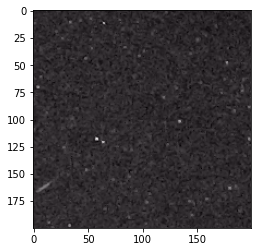

In [3]:
from IPython.core.display import display

trigger = triggers[1]
frames = np.array([
    cut_rect_from_frame(frame, center_rect(trigger, Vec2(100, 100)))
    for frame in get_frames(trigger)
])

display(animate(frames))

In [4]:
def get_stars(frame_list):

    combined = np.sum(frame_list, axis=0)

    # that would be faster np.minimum(a_max, np.maximum(a, a_min)).
    combined = np.clip(combined, 0, 255)

    plt.imshow(combined)
    plt.show()

    print(f"{combined.shape=}, {frame_list.shape=}")

    combined = cv2.cvtColor(combined, cv2.COLOR_BGR2GRAY)

    h_original, w_original = combined.shape

    parts = combined.reshape((-1, 50, 50))

    for idx, part in enumerate(parts):
        colors = part.flatten()
        dev = np.std(colors)
        counts = np.bincount(colors)
        most_freq = np.argmax(counts)

        def filter(color):
            return color if color < most_freq + dev * 4 else 0

        parts[idx] = np.fromiter((filter(c) for c in colors),
                                 dtype=int).reshape(part.shape)

    return parts.reshape((h_original, w_original))


def remove_stars(frame, stars):

    # TODO: there must be a better way
    for idx, pixel in enumerate(frame.nditer):
        if pixel - stars[idx] < 0:
            pixel = 0
    return frame

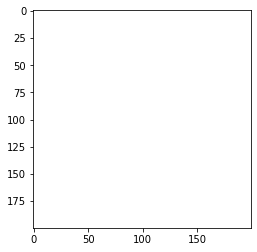

combined.shape=(200, 200, 3), frame_list.shape=(19, 200, 200, 3)


error: OpenCV(4.5.2) ../modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


In [5]:
stars = get_stars(frames)
removed = remove_stars(frames[0],stars)

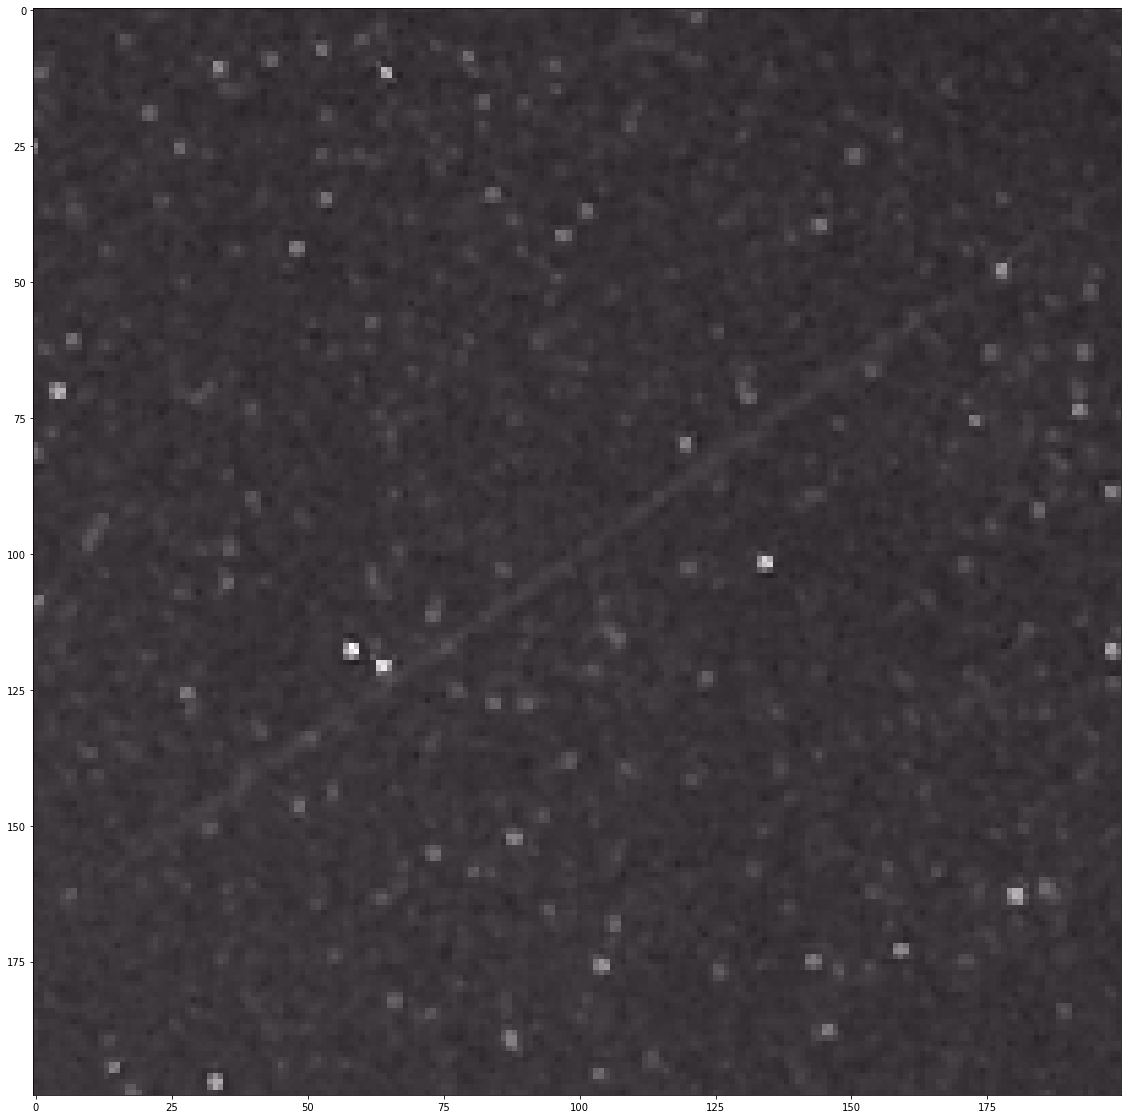

In [13]:
combined = np.sum(frames, axis=0)
# combined = np.average(frames, axis=0)
# combined = np.int32(combined)
# combined = np.int8(frames)
# combined = np.amax(frames, axis=0)

max_val = np.max(combined)
combined = np.divide(combined, max_val)


# combined = cv2.medianBlur(combined, 3)
# combined = np.clip(combined, 0, 256) # Clip values to 255

# combined = cv2.cvtColor(combined, cv2.COLOR_BGR2GRAY)
# combined = [int(i) for i in combined.nditer()]
plt.figure(figsize=(20,20))
plt.imshow(combined)
plt.show()

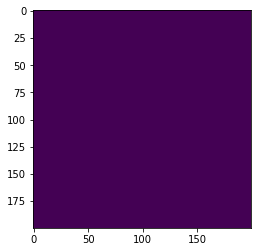

In [23]:
combined = np.int64(combined)
# combined = cv2.cvtColor(combined, cv2.COLOR_BGR2GRAY)
h_original, w_original = combined.shape
parts = combined.reshape((-1, 50, 50))
for idx, part in enumerate(parts):
    colors = part.flatten()
    dev = np.std(colors)
    colors = np.int64(colors)
    counts = np.bincount(colors)
    most_freq = np.argmax(counts)

    def filter(color):
        return color if color < most_freq + dev * 4 else 0

    parts[idx] = np.fromiter((filter(c) for c in colors),
                             dtype=int).reshape(part.shape)

result = parts.reshape((h_original, w_original))
plt.imshow(result)